# Notebook: Exploratory Data Analysis (EDA)

### Check versions of the Python and some key packages to ensure most recent versions are used. 

In [2]:
%load_ext watermark
%watermark -a 'Vusal Babashov' -u -d -v -p numpy,mlxtend,matplotlib,sklearn

Author: Vusal Babashov

Last updated: 2021-03-10

Python implementation: CPython
Python version       : 3.8.2
IPython version      : 7.21.0

numpy     : 1.19.2
mlxtend   : 0.18.0
matplotlib: 3.3.4
sklearn   : 0.24.1



### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer

#your info here
__author__ = "Vusal Babashov"
__email__ = "vbabashov@gmail.com"
__website__ = 'https://vbabashov.github.io'

Data Source: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

### Load the data

In [4]:
#load the data into a Pandas dataframe
# read dataset
file_path = "/Users/vusalbabashov/Desktop/house-prices/data/"
df_train = pd.read_csv(file_path + "train.csv")
df_test_feature = pd.read_csv(file_path + "test.csv")
df_test_target = pd.read_csv(file_path + "sample_submission.csv")

### Examine the data

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test_feature.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_test_target.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Use .info() to see length and dtypes

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df_test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


### Check for duplicates

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_test_feature.duplicated().sum()

0

In [13]:
df_test_target.duplicated().sum()

0

In [14]:
# check if there is a missing value in each column and how many missing cells for the training set
with pd.option_context('display.max_rows', None):
    display(df_train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We can see that some columns have signifantly large number of missing values than others. So I decided to drop columns if more than 80% (arbitrary choice!) of the values are missing in the model development.

In [15]:
# check if there is a missing value in each column and how many missing cells for the test set
with pd.option_context('display.max_rows', None):
    display(df_test_feature.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
# check if there is a missing value in each column and how many missing cells for the test set target
with pd.option_context('display.max_rows', None):
    display(df_test_target.isnull().sum())

Id           0
SalePrice    0
dtype: int64

#### Summarize numerical and categorical variables separately

In [17]:
# Summarize numerical variables
df_train.describe(include = [np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
# Summarize categorical variables
df_train.describe(include = ['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### Visualize target variable (SalePrice)

<Figure size 1296x432 with 0 Axes>

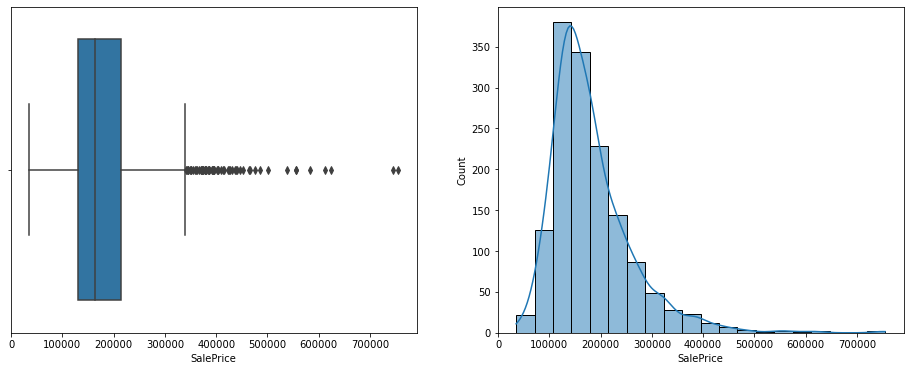

In [54]:
plt.figure(figsize = (18, 6))
f, axes = plt.subplots(1, 2, figsize = (16, 6))
sns.boxplot(x=df_train["SalePrice"],  ax=axes[0])
sns.histplot(df_train["SalePrice"], kde=True, bins = 20,  ax=axes[1])
plt.show()
f.savefig('saleprice.jpeg')

SalePrice is skewed to the left. There are some outliers. Log-transformation can make the SalePrice to follow (approximatly) Normal distribution as shown below.

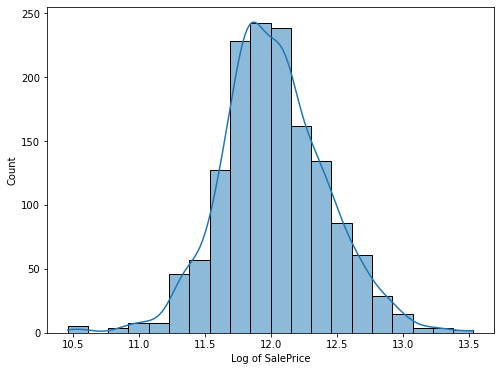

In [20]:
plt.figure(figsize = (8, 6))
sns.histplot(np.log(df_train["SalePrice"]), kde=True, bins=20)
plt.ylabel('Count')
plt.xlabel('Log of SalePrice')
plt.show()

### Use IQR rule to identify potential outliers

In [21]:
stat = df_train.SalePrice.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
The upper and lower bounds for suspected outliers are 340037.5 and 3937.5.


In [22]:
# Outliers

In [23]:
stat = df_train.GrLivArea.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
The upper and lower bounds for suspected outliers are 2747.625 and 158.625.


In [24]:
stat = df_train.TotalBsmtSF.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
The upper and lower bounds for suspected outliers are 2052.0 and 42.0.


In [25]:
stat = df_train.GarageArea.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
The upper and lower bounds for suspected outliers are 938.25 and -27.75.


### Examine potential outliers

In [26]:
#check potential outlier below lower bound
df_train[df_train.SalePrice < 3937.5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [27]:
#check potential outlier above upper bound
df_train[df_train.SalePrice > 340037.5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500


In [32]:
nominal = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                   'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MoSold',
                   'SaleType', 'SaleCondition'] #removed Alley, MiscFeature due to missingness

ordinal = ['LotShape','Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 
                   'ExterQual','ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
                   'Functional', 'FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond',
                   'PavedDrive']  #removed PoolQC, Fence due to high missingness  


numeric = [ 'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                  'BsmtUnfSF','GrLivArea','BedroomAbvGr', 'TotRmsAbvGrd',
                  'Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'KitchenAbvGr',
                  '3SsnPorch','ScreenPorch','PoolArea',
                  'GarageYrBlt', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
                  '1stFlrSF','2ndFlrSF', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 'MiscVal', 
                  'BsmtFinSF2', 'LowQualFinSF', 
                  'TotalBsmtSF'] #removed ID

target_var = 'SalePrice'


In [77]:
def box_plots (df, cat_vars):
    '''Box-plots to review relationship between independent categorical variables and target'''
    f = plt.figure(figsize=(12,74))
    for count, value in enumerate(cat_vars):
        f.add_subplot(23, 2, count+1)
        sns.boxplot(x = df[value], y = 'SalePrice', data = df)
        plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
    f.savefig('boxplots.jpeg')

In [72]:
def scatter_plots (df, cont_vars):
    '''Scatter plots to review relationship between independent continious variables and target'''
    f = plt.figure(figsize=(14,24))
    for count, value in enumerate(cont_vars):
        f.add_subplot(10, 4, count+1)
        sns.scatterplot(x=df[value], y=target_var, data=df)
    plt.tight_layout()
    plt.show()
    f.savefig('scatter.jpeg')

In [68]:
def cor_heat_map (df, numerical_vars):
    '''Correlation heatmap between the numerical features and the features and target'''
    f, ax = plt.subplots(figsize=(24, 20))
    corr = df[numerical_vars + ['SalePrice']].corr(method='pearson') 
    hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
    f.subplots_adjust(top=0.95)
    t = f.suptitle('House Pricing Dataset Correlation Heatmap', fontsize=16)
    f.savefig('heatmap.jpeg')

### Create Visualizations for Features and Target

In [75]:
categorical_vars = nominal + ordinal

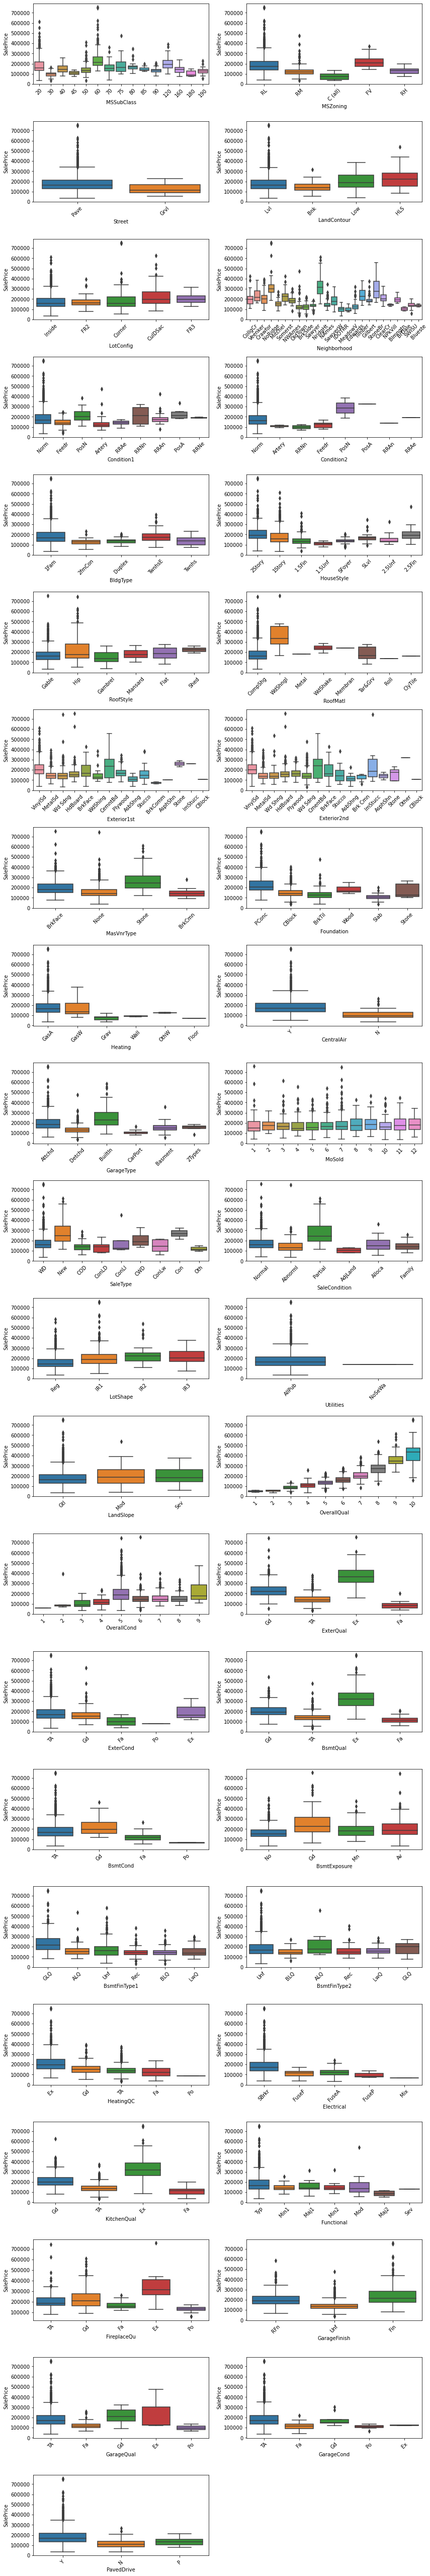

In [78]:
box_plots (df_train, categorical_vars) # box-plots for categorical features versus sale price

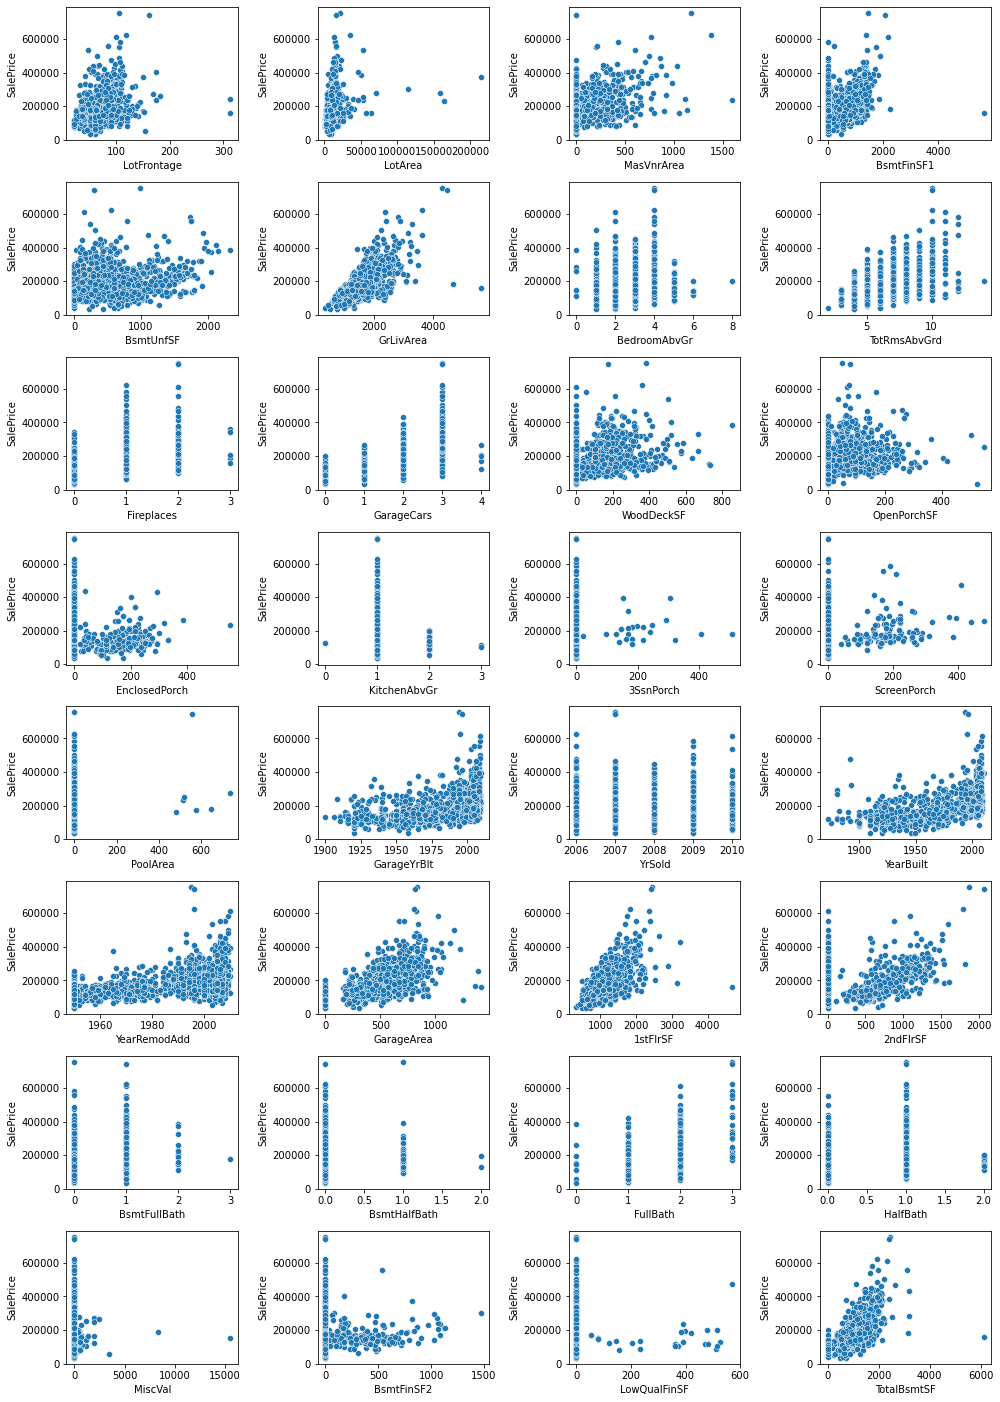

In [73]:
scatter_plots(df_train, numeric) #scatter plots for numerical features versus sale price

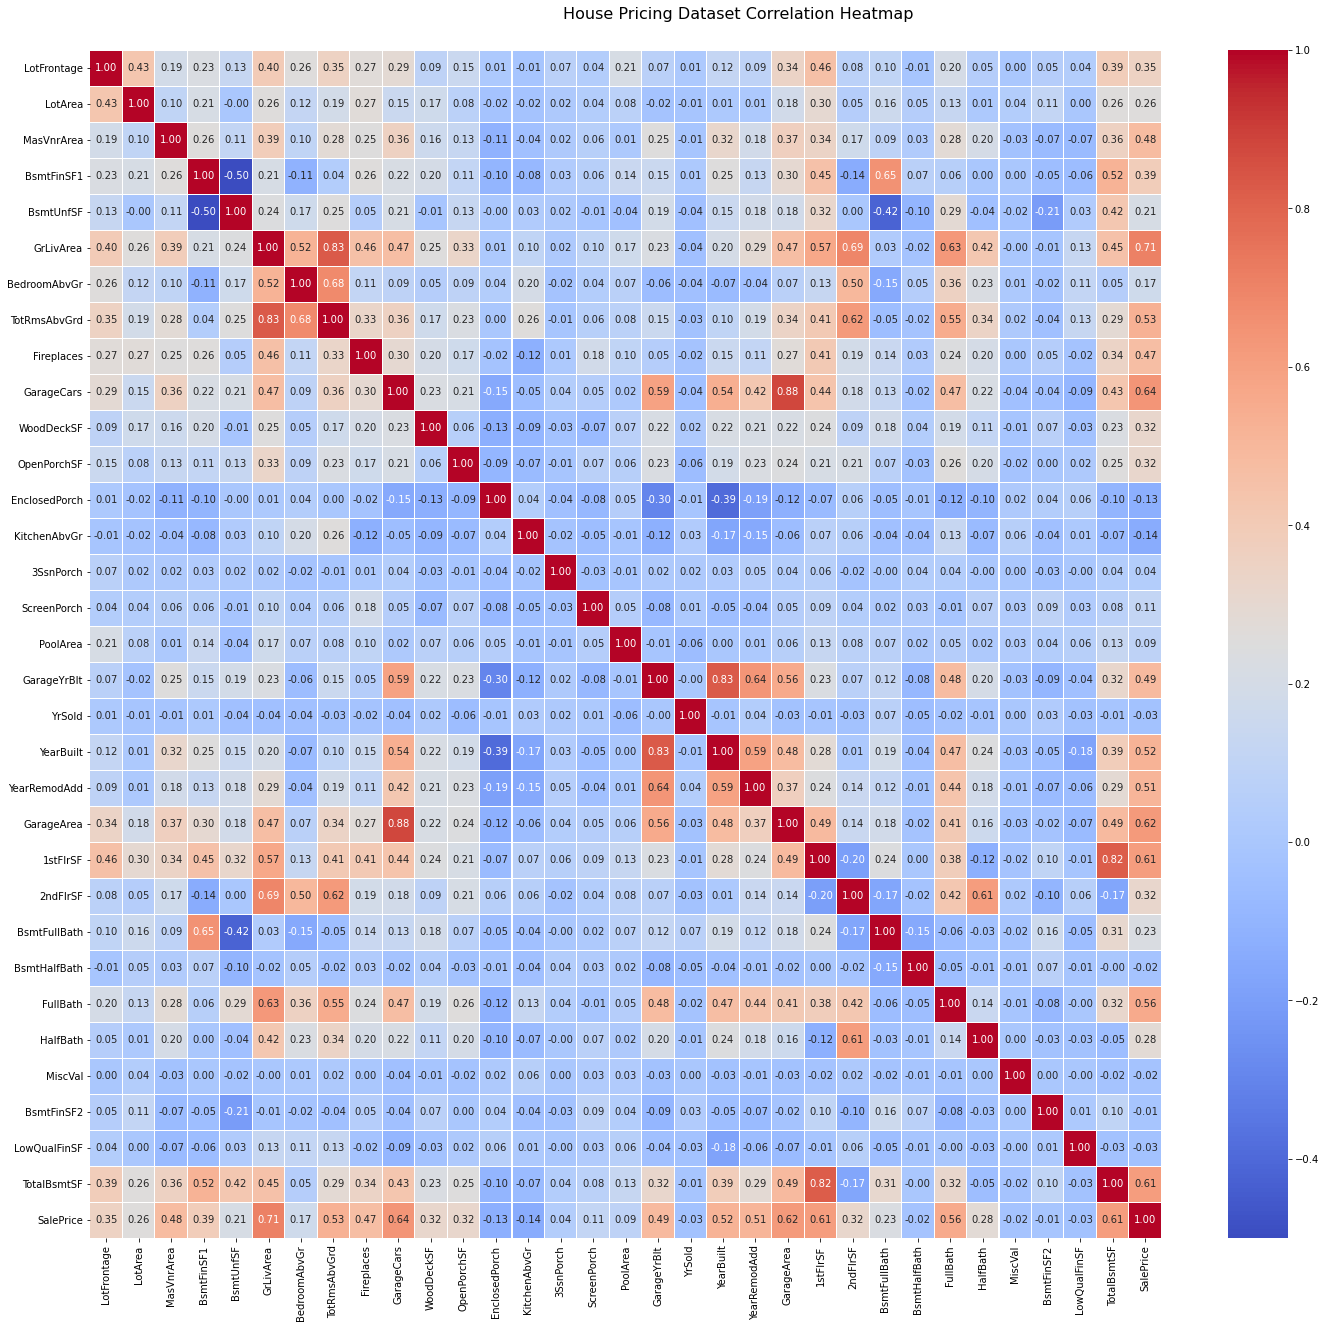

In [69]:
cor_heat_map(df_train, numeric) #correlation heatmap for numerical features and target

Observations:

1. According to the heatmap, house SalePrice is correlated with OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF (Pearson Correlation Cofficient >=0.6). There seems to be a weak correlation between SalePrice and rest of the features (Pearson Correlation Cofficient <= 0.5).

2. Some features are either correlated with other features, or unlikely to explain any variability in SalePrice or limited in data, and thus can be dropped from the training dataset: 'Id' (i.e., unique for each house), 'MoSold', 'MSSubClass', 'BsmntFinSF2', 'BsmntHalfBath', 'MiscVal', Alley, PoolQC, 'Fence', 'MiscFeature','YrSold', 'GarageYrBlt'

3. Scatter plots also reveal correlated relationship between target and some features: 1stFlrSF,2ndFlrSF, GrLivArea,OverallQual, GarageArea and TotalBsmtSF.

4. Box-plots show the distribution of SalePrice across the level of cateogories. There is no obvious relationship. For most part, distributions are similar, i.e, median SalePrice is not statistically different from one level to another. However, there are certaing category levels where the median SalePrice is statistically different.